## EDA on Haberman Survival Dataset

In [55]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
#loading the data
hbmn = pd.read_csv("haberman.csv")

In [57]:
#checking the rows and columns of our data-set
print(hbmn.shape)

(306, 4)


In [58]:
#printing the columns of our data-set
print(hbmn.columns)

Index(['Age', 'Op_Year', 'xil_nodes', 'Surv_status'], dtype='object')


In [59]:
#checking whether our data is balanced or not
hbmn["Surv_status"].value_counts()

1    225
2     81
Name: Surv_status, dtype: int64

The following observation is drawn:
1. The data-set is imbalanced.
2. There are a total of 306 patients, out of whoch 225 patients survived while 81 did not.

#### PLOTTING 2-D SCATTER PLOTS AGAINST VARIOUS DATA-SET COLUMNS

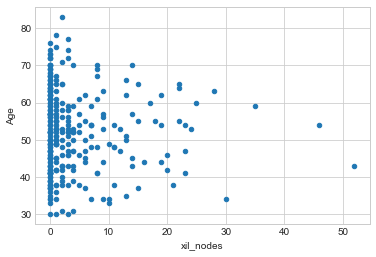

In [60]:
hbmn.plot(kind="scatter", x="xil_nodes", y="Age")

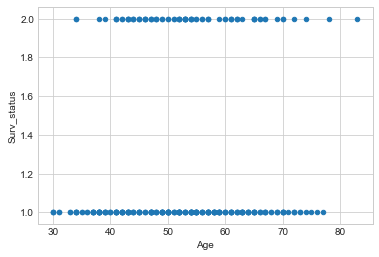

In [61]:
hbmn.plot(kind="scatter", x="Age", y="Surv_status")

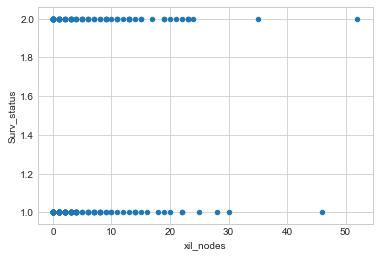

In [62]:
hbmn.plot(kind="scatter", x="xil_nodes", y="Surv_status")

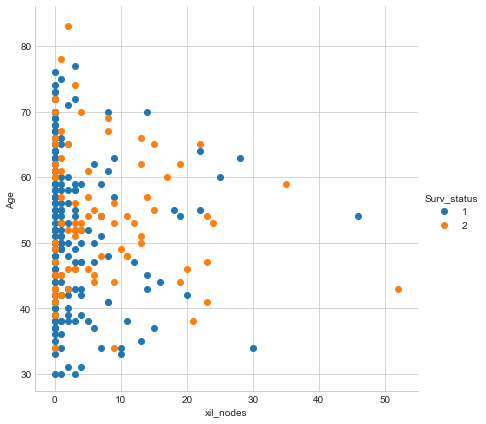

In [63]:
#2-D Scatter plot with corresponding colour for both the survival status of patients

sns.set_style("whitegrid")
sns.FacetGrid(hbmn, hue='Surv_status', size=6)\
   .map(plt.scatter,"xil_nodes",'Age')\
   .add_legend()

#### PLOTTING 3-D SCATTER PLOTS

In [64]:
plt.close()

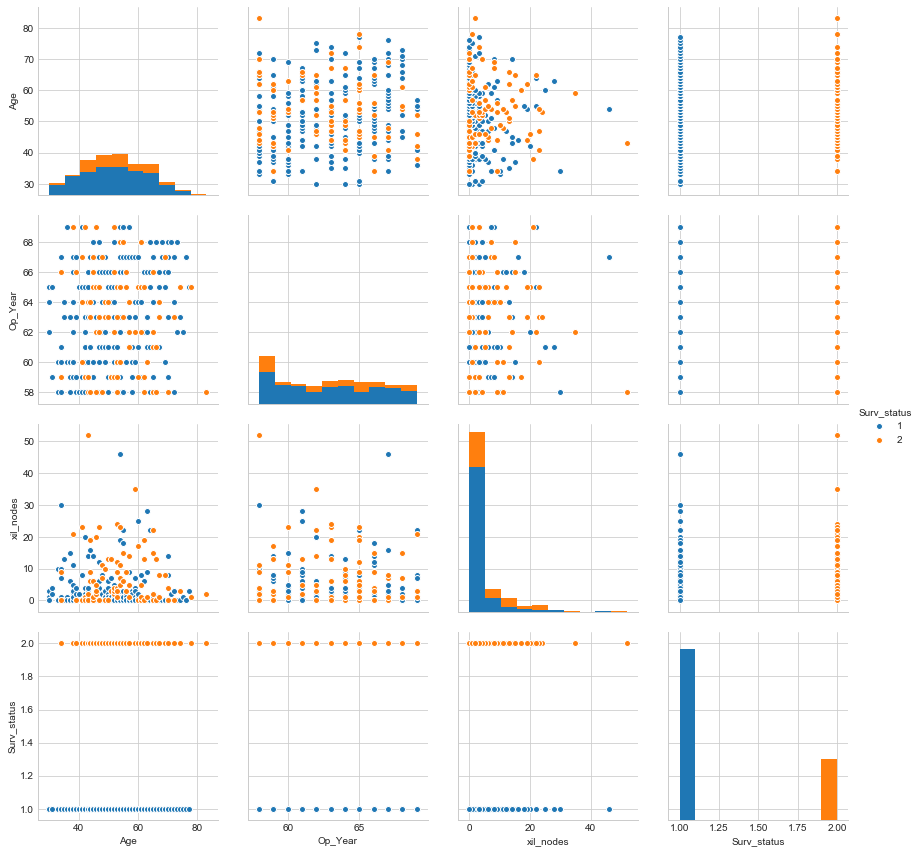

In [65]:
sns.set_style("whitegrid")
sns.pairplot(hbmn, hue="Surv_status", size=3)

### PDF (PROBABILTY DISTRIBUTION FUNCTION):

#### Plotting of PDF in three ways:
1. PDF of AGE
2. PDF of Operation Age
3. PDF of Axillary Nodes

PDF OF AGE:

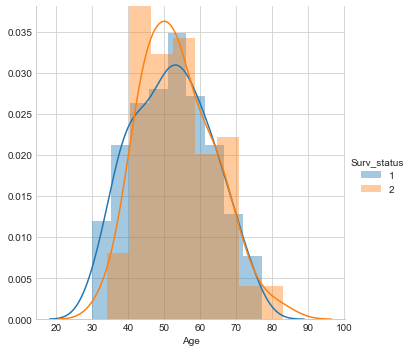

In [66]:
sns.FacetGrid(hbmn, hue='Surv_status', size = 5) \
    .map(sns.distplot, 'Age') \
    .add_legend()

This histogram is overlapping with each other, but still we can say that:
1. People within the range of 40-60 are more likely to die. 
2. People less than 40 years of age are more likely to survive.
3. People whose age is in the range 60-75 have equal chances of a surviving and not surviving.
Yet, this cannot be our final conclusion. We cannot decide the survival chances of a patient just by considering the age perimeter.

PDF OF OPERATION AGE:

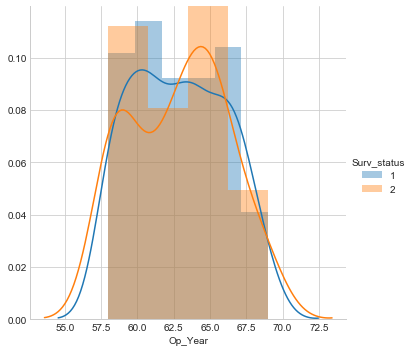

In [67]:
sns.FacetGrid(hbmn, hue='Surv_status', size = 5) \
    .map(sns.distplot, 'Op_Year') \
    .add_legend()

This histogram is majorly overlapping. But we can conclude that:
A large number of patients died whose operation was done between the year 60 and 65.
As this graph only tells us how many operations were unsuccessful and how many were not. Hence, this cannot be a parameter to decide the patient's survival chances.

PDF OF AXILIARY NODES:

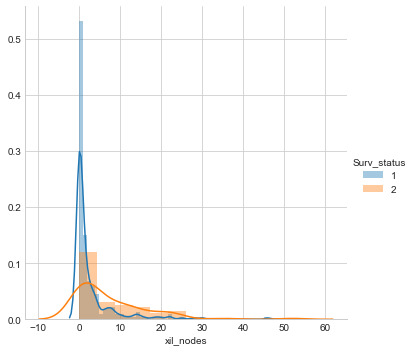

In [68]:
sns.FacetGrid(hbmn, hue='Surv_status', size = 5) \
    .map(sns.distplot, 'xil_nodes') \
    .add_legend()

From this histogram, foloowing observations can be drawn:
1. Patients having 0 or 1 nodes are more likely to survive. 
2. There are a vert few chances of surviving if there are 25 or more nodes.

### CDF (Cummulative Distribution Function)

[0.64379085 0.12745098 0.04575163 0.05228758 0.01960784 0.03921569
 0.00980392 0.01633987 0.02287582 0.00653595 0.00326797 0.00326797
 0.         0.00326797 0.         0.         0.         0.00326797
 0.         0.00326797]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]


Text(0.5,0,'xil_nodes')

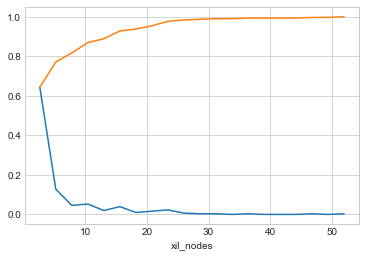

In [69]:
counts, bin_edges = np.histogram(hbmn["xil_nodes"], bins=20, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('xil_nodes')

Obeservations drawn from CDF:
1. The orange line shows that there is a 85% chance of long survival of a patient if number of axillary nodes detected are less than 5.
2. As the number of axillary nodes increases, survivial chances of a patient reduces as clearly obsreved that 80% to 85% of people have good chances of survival if they have less number of axillary nodes detected and as nodes increases the survival status also decreases and as a result 100% of people have less chances of survival if nodes increases > 40%.

###### MEAN:

In [70]:
print(np.mean(hbmn["xil_nodes"]))

4.026143790849673


###### STANDARD DEVIATION(MEAN WITH OUTLIER):

In [71]:
print(np.std(np.append(hbmn["xil_nodes"],50)))

7.629981499515333


###### MEDIAN:

In [72]:
print(np.median(hbmn['xil_nodes']))

1.0


###### MEDIAN WITH OUTLIER:

In [73]:
print(np.median(np.append(hbmn['xil_nodes'],50)))

1.0


###### QUANTILES:

In [74]:
print(np.percentile(hbmn['xil_nodes'], np.arange(0,100,25)))

[0. 0. 1. 4.]


###### 90th Percentile: 

In [75]:
print(np.percentile(hbmn['xil_nodes'], 90))

13.0


###### Median Absolute Deviation:

In [76]:
from statsmodels import robust
print(robust.mad(hbmn['xil_nodes']))

1.482602218505602


#### BOX-PLOT and WHISKERS:

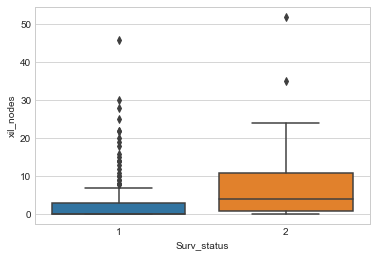

In [77]:
sns.boxplot(x='Surv_status', y ='xil_nodes', data=hbmn)

Obeservations drawn from Box-plot and whiskers:
1. The more number of axil nodes, the more likely patients die.
2. The patients who has axils from 1 to 24(approx) are the majority of patients who died.

#### VIOLIN - PLOT:

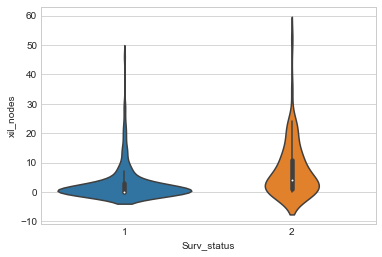

In [78]:
sns.violinplot(x='Surv_status', y='xil_nodes', data= hbmn, kind= "kde")

Obeservations drawn from Violin plot:
1. The large number of patients who survived had 0 axil nodes.
2. Patients who died had axil node greater than or equal to 1 and as the concentration of axil node increases the patient is more likely to die.

#### CONTOUR PLOT:

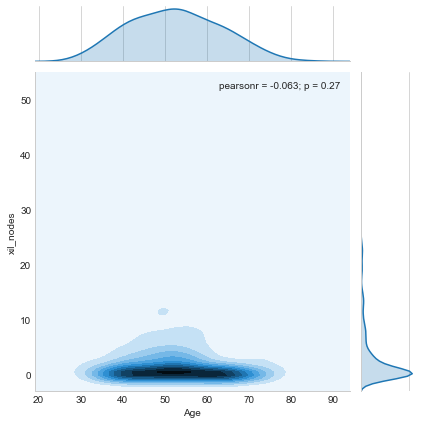

In [79]:
sns.jointplot(x='Age', y='xil_nodes', data = hbmn, kind="kde")
plt.grid()

The above density plot uses features "Age" and "Axillary Nodes". It is observed that the density of point for long survival is more from age in range between 45 to 60 years old and axillary nodes from 0 t 3.

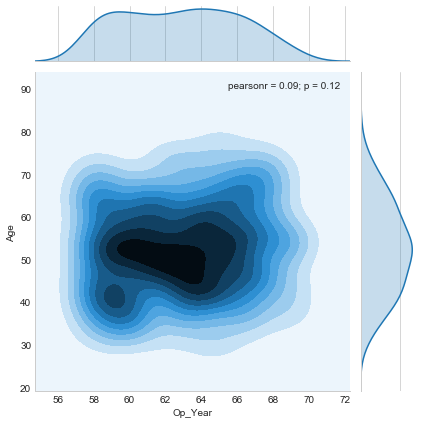

In [80]:
sns.jointplot(x='Op_Year', y='Age', data = hbmn, kind="kde")
plt.grid()

The above density plot uses features "Operation Year" and "Age". It is observed that from Year 1960 to 1964, more operations done on the patients between the age group 45 to 55.  

### CONCLUSIONS:

1. The chances of survival of a patient is inversly proportional to the number of axillary nodes present.
2. The Age of a patient and his Operation Year alone are not the only deciding factors for his/her life. Yet, poeple  less than 35 years of age have more chances of survival.
3. Axillary Node is most important feature in this dataset as patients who had Axil node >= 1 those are more likely to die.
4. However, since the data is imbalanced, the object of classifying the survival status of a new patient based on the givn features is a difficult task.
5. Yet Yes, you can diagnose the Cancer using Haberman’s Data set by applying various data analysis techniques and using various Python libraries.